<a href="https://colab.research.google.com/github/saber7777/Machine-Learning-projects/blob/main/Logistic_regression%2C_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Gradient descent - Logistic regression**









 

In this question we are going to experiment with logistic regression. This exercise focuses on the inner workings of gradient descent using a cross-entropy cost function as it was learned in class.

a) Using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database), first apply a feature selection algorithm based on evaluating feature importance using [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (see <a href=https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.pearsonr.html>scipy documentation</a>). Extract the top two most important features based on this measure. Then, separate a random 20% of your data instances for validation.


In [ ]:
import numpy as np
import pandas as pd
# from google.colab import files
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

# uploaded = files.upload()

# read diabetes.csv file
data = pd.read_csv('diabetes.csv')

# when read the file as the input, drop the label column-['Outcome']
X = data.drop(['Outcome'], axis = 1)

# read the label column
Y = data['Outcome']

# using pearson correlation to calculate and print out column by column
for i in X.columns:
    print(i, ': ', pearsonr(X[i].to_numpy(), Y.to_numpy()))

# by checking the Pearson’s correlation coefficient, BMI and Glucose are the two most relevant fearures
print('Two most important features: BMI and Glucose')

# train the model using extracted features
X = X[['Glucose', 'BMI']]

# we split the data into training and validation, test size is 20%
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)



Pregnancies :  (0.22189815303398686, 5.065127298051249e-10)
Glucose :  (0.466581398306874, 8.935431645286498e-43)
BloodPressure :  (0.06506835955033283, 0.07151390009773193)
SkinThickness :  (0.0747522319183194, 0.03834770482047633)
Insulin :  (0.13054795488404775, 0.000286186460360213)
BMI :  (0.29269466264444544, 1.2298074873111402e-16)
DiabetesPedigreeFunction :  (0.17384406565296007, 1.254607010148255e-06)
Age :  (0.2383559830271977, 2.209975460664566e-11)
Two most important features: BMI and Glucose


b) We want to train a logistic regression model to predict the target feature *Outcome* . It’s important that no other external package is used (pandas, numpy are ok) **for this question part** . We want to find the weights for the logistic regression using a hand made gradient descent algorithm. We will use cross-entropy as the cost function, and the logistic cross-entropy to compute the weight update during gradient descent. It is OK to reuse as much as you need from the code you developed for Assignment 1. Differently from what we did for Assignment 1, we are now using a random 20% of your data instances for validation.

Your function should be able to return the updated weights and bias after every iteration of the gradient descent algorithm.

Your function should be defined as follows:

``
def LRGradDesc( data, target, weight_init, bias_init, learning_rate, max_iter ):``

And it should print lines as indicated below (note the last line with the weights):

`Iteration 0: [initial_train cost], [train accuracy], [validation accuracy]`

`Iteration 1: [train cost after first iteration], [train accuracy after first iteration], [validation accuracy after first iteration]`

`Iteration 2: [weights after second iteration], [train cost after second iteration], [train accuracy after second iteration], [validation accuracy after second iteration]`

…

`Iteration max_iter : [weights after max_iter iteration], [train cost after max_iter iteration], [train accuracy after max_iter iteration], [validation accuracy after max_iter iterations]`

`Final weights: [bias], [w_0], [w_1]`

Note that you may want to print every 100 or every 1000 iterations if `max_iter` is a fairly large number (but you shouldn’t have more iterations than the indicated in `max_iter`).

In [ ]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

# predict function: y = 1 when y_hat >= 0.5, else y_hat = 0
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_predicted = sigmoid(z)
    y_y = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_y

# check how many examples get right by the total number of examples
def accury(y, pred):
    accury = np.sum(y == pred) / len(y)
    return accury
  
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples

def LRGradDesc(data, target, weight_init, bias_init, learning_rate, max_iter ):
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

    target_train  = y_train.values
    target_valid = y_valid.values
    data_train = X_train.T.values
    data_valid = X_valid.T.values

    # m -> number of training examples
    m, n = X_train.shape
    
    for i in range(max_iter):

        # approximate y with linear combination of weights and x, plus bias
        z = np.dot(data_train.T, weight_init) + bias_init

        # apply for sigmoid function
        y_hat = sigmoid(z)

        # entropy cost function
        cost = -(1/m)*np.sum(target_train*np.log(y_hat) + (1-target_train)*np.log(1-y_hat))

        #partial derivative with respect to w
        dw = (1 / m) * np.dot(data_train, (y_hat - target_train))
        db = (1 / m) * np.sum(y_hat - target_train)

        # gradient descent
        weight_init = weight_init - learning_rate * dw

        if i % 100 == 0:
              print('Iteration ', i)
              print('Weight after ',i, "iteration: ", weight_init)
              print('Cost after ',i, "iteration: ", cost)
              print('Train accury after ',i, "iteration: ", accury(target_train, predict(data_train.T, weight_init, bias_init)))
              print('Test accury after ',i, "iteration: ", accury(target_valid, predict(data_valid.T, weight_init, bias_init)))
              print()
    return weight_init
weight = LRGradDesc(X, Y, np.zeros(X_train.shape[1]), 0, 0.001, 10000 ) 

Iteration  0
Weight after  0 iteration:  [-0.01155293 -0.00376873]
Cost after  0 iteration:  0.6931471805599454
Train accury after  0 iteration:  0.6530944625407166
Test accury after  0 iteration:  0.6428571428571429

Iteration  100
Weight after  100 iteration:  [-0.01776934 -0.04783816]
Cost after  100 iteration:  0.8270682848686558
Train accury after  100 iteration:  0.6530944625407166
Test accury after  100 iteration:  0.6428571428571429

Iteration  200
Weight after  200 iteration:  [-0.01592344 -0.06410891]
Cost after  200 iteration:  0.8808123369811419
Train accury after  200 iteration:  0.6530944625407166
Test accury after  200 iteration:  0.6428571428571429

Iteration  300
Weight after  300 iteration:  [-0.01557242 -0.07099473]
Cost after  300 iteration:  0.9196568549356914
Train accury after  300 iteration:  0.6530944625407166
Test accury after  300 iteration:  0.6428571428571429

Iteration  400
Weight after  400 iteration:  [-0.01561764 -0.07394222]
Cost after  400 iteration: 

c) Discuss how the choice of learning_rate affects the fitting of the model.

Learning_rate can affect the training speed and the training precision of the model. The larger the learning_rate is, the training speed is faster and the step of the weight becomes larger. The smaller the learning_rate is, the training speed is slower and the step of the weight descent is smaller, which can make the model more precise.

d) Compare accuracy of your model with the one using [Sklearn  library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to compute logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
# call LogisticRegression and fit it
model = LogisticRegression()
model.fit(X_train, y_train)

print("train accury: ", (model.predict(X_train) == y_train).mean())
print("test accury: ", (model.predict(X_valid) == y_valid).mean())

train accury:  0.762214983713355
test accury:  0.7662337662337663


e) Retrain your model using three features of your choice. Compare both models using an ROC curve (you can use code from [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py) to draw the ROC curve).

In [ ]:
# read diabetes.csv file
data = pd.read_csv('diabetes.csv')

# when read the file as the input, drop the label column-['Outcome']
A = data.drop(['Outcome'], axis = 1)

# read the label column
B = data['Outcome']

# choose BMI, Insulin, SkinThickness
A = A[["BMI", "Insulin", "SkinThickness"]]
A_train, A_valid, b_train, b_valid = train_test_split(A, B, test_size=0.2, random_state=42)

w = LRGradDesc(A, B, np.zeros(X_train.shape[1]), 0, 0.001, 10000 )

Iteration  0
Weight after  0 iteration:  [-0.00376873 -0.00646987 -0.00269788]
Cost after  0 iteration:  0.6931471805599454
Train accury after  0 iteration:  0.6530944625407166
Test accury after  0 iteration:  0.6428571428571429

Iteration  100
Weight after  100 iteration:  [-0.01408095 -0.02088054 -0.01445416]
Cost after  100 iteration:  0.8695353436672402
Train accury after  100 iteration:  0.6530944625407166
Test accury after  100 iteration:  0.6428571428571429

Iteration  200
Weight after  200 iteration:  [-0.01391008 -0.02084792 -0.0148029 ]
Cost after  200 iteration:  0.8698637304967449
Train accury after  200 iteration:  0.6530944625407166
Test accury after  200 iteration:  0.6428571428571429

Iteration  300
Weight after  300 iteration:  [-0.01389573 -0.02084517 -0.01483222]
Cost after  300 iteration:  0.8698916388905329
Train accury after  300 iteration:  0.6530944625407166
Test accury after  300 iteration:  0.6428571428571429

Iteration  400
Weight after  400 iteration:  [-0.0

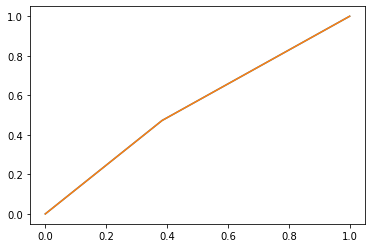

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# get the prediction of the input value
data = X_valid.values
pred = predict(data, weight, 0)
data2 = A_valid.values
pre = predict(data2, w, 0)

x, y, _ = roc_curve(y_valid, pred)
m, n, _ = roc_curve(b_valid, pre)
plt.plot(x, y)
plt.plot(m,n)

plt.show()

## **2. Multi-class classification using neural networks**

In this question you will experiment with a neural network in the context of text classification, where a document can belong to one out of several possible categories. The main goal for you is to try different hyperparameters in a systematic manner so that you can propose a network configuration that is properly justified. You will experiment with the [MNIST digits](https://keras.io/api/datasets/mnist/), which can be loaded directly from Keras:

```python
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Reshape  28 x 28 matrices into 60,000 784-length vectors and normalize each value for each pixel for the entire vector for each input

In [ ]:
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
X_train.shape

(60000, 784)

Build a sequential model using keras.models.Sequential and add dense layers and experiment with it. Compile and train the model. 

After building a working model, follow instructions as per Q2.a and Q2.b







In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, epochs=5, batch_size=128)

# reference: tutorial_7_Keras_MLP

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.1764 - accuracy: 0.3846
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7154 - accuracy: 0.6148
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 1.2328 - accuracy: 0.7203
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9207 - accuracy: 0.7838
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7366 - accuracy: 0.8214


In [ ]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1398 - accuracy: 0.9593
Test score: 0.1397920697927475
Test accuracy: 0.9592999815940857


a) As we load the data from the built-in keras function, it splits them into two subsets; however, it is recommended to split the data into three subsets such as:
``` 
70% train, 15% val, 15% test.
80% train, 10% val, 10% test.
60% train, 20% val, 20% test.
```
Use the mentioned ratios to split the data and train the model using these portions. For each one of your experiments, train the model and report the loss and accuracy of model on the training and validation set. (for more information check this [link](https://scikit-learn.org/stable/modules/learning_curve.html#:~:text=2.-,Learning%20curve,error%20or%20a%20bias%20error.))  


In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

# 80% train, 10% val, 10% test
DATASET_SIZE = 70000
TRAIN_RATIO = 0.80
VALIDATION_RATIO = 0.10
TEST_RATIO = 0.10

# add toghether train and test sets and then iteratively split them into train, val and test based on your ratios.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# concatenate the train and test set
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# split data: 80% as train, 20% as validation + test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))

# split data: 10% as test, 10% as validation
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

# transform it into a float32 array of shape (X_train.shape[0], 28 * 28) with values between 0 and 1.
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255

# transform it into a float32 array of shape (X_val.shape[0], 28 * 28) with values between 0 and 1.
X_val = X_val.reshape((X_val.shape[0], 28 * 28))
X_val = X_val.astype('float32') / 255

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# passing the expected shape of the input data to the first layer
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# report the loss and accuracy of model on the training
model.fit(X_train, y_train, epochs=5, batch_size=128)
score = model.evaluate(X_train, y_train)
print('train loss:', score[0])
print('train accuracy:', score[1])
#report the loss and accuracy of model on the validation
model.fit(X_val, y_val, epochs=5, batch_size=128)
score = model.evaluate(X_val, y_val)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/5
438/438 [==============================] - 2s 3ms/step - loss: 0.4742 - accuracy: 0.8742
Epoch 2/5
438/438 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.9271
Epoch 3/5
438/438 [==============================] - 1s 3ms/step - loss: 0.2160 - accuracy: 0.9381
Epoch 4/5
438/438 [==============================] - 1s 3ms/step - loss: 0.1889 - accuracy: 0.9452
Epoch 5/5
1750/1750 [==============================] - 3s 1ms/step - loss: 0.1554 - accuracy: 0.9550
train loss: 0.15541981160640717
train accuracy: 0.954964280128479
Epoch 1/5
55/55 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9487
Epoch 2/5
55/55 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.9536
Epoch 3/5
55/55 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9563
Epoch 4/5
55/55 [==============================] - 0s 3ms/step - loss: 0.1393 - accuracy: 0.9611
Epoch 5/5
219/219 [==============================

b) Experiment with different hyperparameters and report your best accuracy found. The most important hyperparameters that you need to experiment with in this question part are: 

* number of layers
* nodes per hidden layer
* learning rate
* number of epochs

To select the best hyper-parameter, draw the loss and accuracy curve.

In [ ]:
# change number of layers

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
X_train.shape

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, epochs=5, batch_size=128)

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4807 - accuracy: 0.8684
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2278 - accuracy: 0.9344
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1789 - accuracy: 0.9483
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1507 - accuracy: 0.9565
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1376 - accuracy: 0.9579
Test loss: 0.1375555694103241
Test accuracy: 0.9578999876976013


In [ ]:
# change nodes per hidden layer

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
X_train.shape

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(96, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, epochs=5, batch_size=128)

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.3464 - accuracy: 0.9060
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1728 - accuracy: 0.9509
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1291 - accuracy: 0.9633
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - accuracy: 0.9706
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9724
Test loss: 0.09593164920806885
Test accuracy: 0.9724000096321106


In [ ]:
# change learning rate

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
X_train.shape

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, epochs=5, batch_size=128)

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.9056
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1665 - accuracy: 0.9525
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1376 - accuracy: 0.9608
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1227 - accuracy: 0.9650
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1682 - accuracy: 0.9578
Test loss: 0.16821643710136414
Test accuracy: 0.9577999711036682


In [ ]:
# change number of epochs

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
X_train.shape

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))

# change epochs 5 to 10
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.fit(X_train, y_train, epochs=10, batch_size=128)

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4590 - accuracy: 0.8791
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2428 - accuracy: 0.9306
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1999 - accuracy: 0.9421
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1722 - accuracy: 0.9498
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1523 - accuracy: 0.9557
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1374 - accuracy: 0.9596
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.9631
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9653
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1096 - accuracy: 0.9678
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.1309 - accuracy: 0.9614

By comparing the loss and accuracy of each change in hyperparameters, the best accuracy is changing the nodes per hidden layer, so it is the most important hyperparameter and will draw the curve

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3567 - accuracy: 0.9028 - val_loss: 0.2195 - val_accuracy: 0.9355
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1801 - accuracy: 0.9491 - val_loss: 0.1485 - val_accuracy: 0.9571
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1314 - accuracy: 0.9625 - val_loss: 0.1287 - val_accuracy: 0.9614
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1041 - accuracy: 0.9700 - val_loss: 0.1075 - val_accuracy: 0.9682
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0856 - accuracy: 0.9752 - val_loss: 0.1007 - val_accuracy: 0.9703


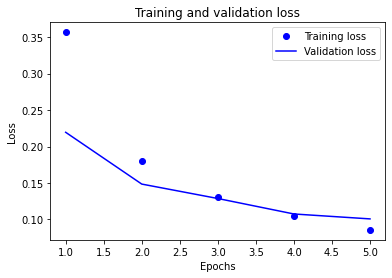

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
X_train.shape

import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(96, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# train our model for 5 epochs (5 iterations over all samples in the x_train and 
# y_train tensors), in mini-batches of 128 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

history_dict = history.history
history_dict.keys()


# use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# reference: # reference: tutorial_7_Keras_MLP

## **3. Computational graph (no code involved)**

This question aims at checking your understanding on defining arbitrary network architectures and compute any derivative involved for optimization.

Consider a neural network with N input units, N output units, and K hidden units. The activations are computed as follows:

$$
\begin{array}{l}
\mathbf{z}=\mathbf{W}^{(1)} \mathbf{x}+\mathbf{b}^{(1)} \\
\mathbf{h}=\sigma(\mathbf{z}) \\
\mathbf{y}=\mathbf{x}+\mathbf{W}^{(2)} \mathbf{h}+\mathbf{b}^{(2)}
\end{array}
$$

where $\sigma$ denotes the logistic function, applied elementwise. The cost involves a squared difference with the target $\mathbf{s}$ (with a 0.5 factor) and a regularization term that accounts for the dot product with respect to an external vector $\mathbf{r}$. More concretely:
$$
\begin{array}{l}
\mathcal{E}=\mathcal{R}+\mathcal{S} \\
\mathcal{R}=\mathbf{\lambda} \mathbf{|W|} \\
\mathcal{S}=\frac{1}{2}\|\mathbf{y}-\mathbf{s}\|^{2}
\end{array}
$$


a) Draw the computation graph relating $\mathbf{x}$, $\mathbf{z}$, $\mathbf{h}$, $\mathbf{y}$, $\mathcal{R}$, $\mathcal{S}$, and $\mathcal{E}$.

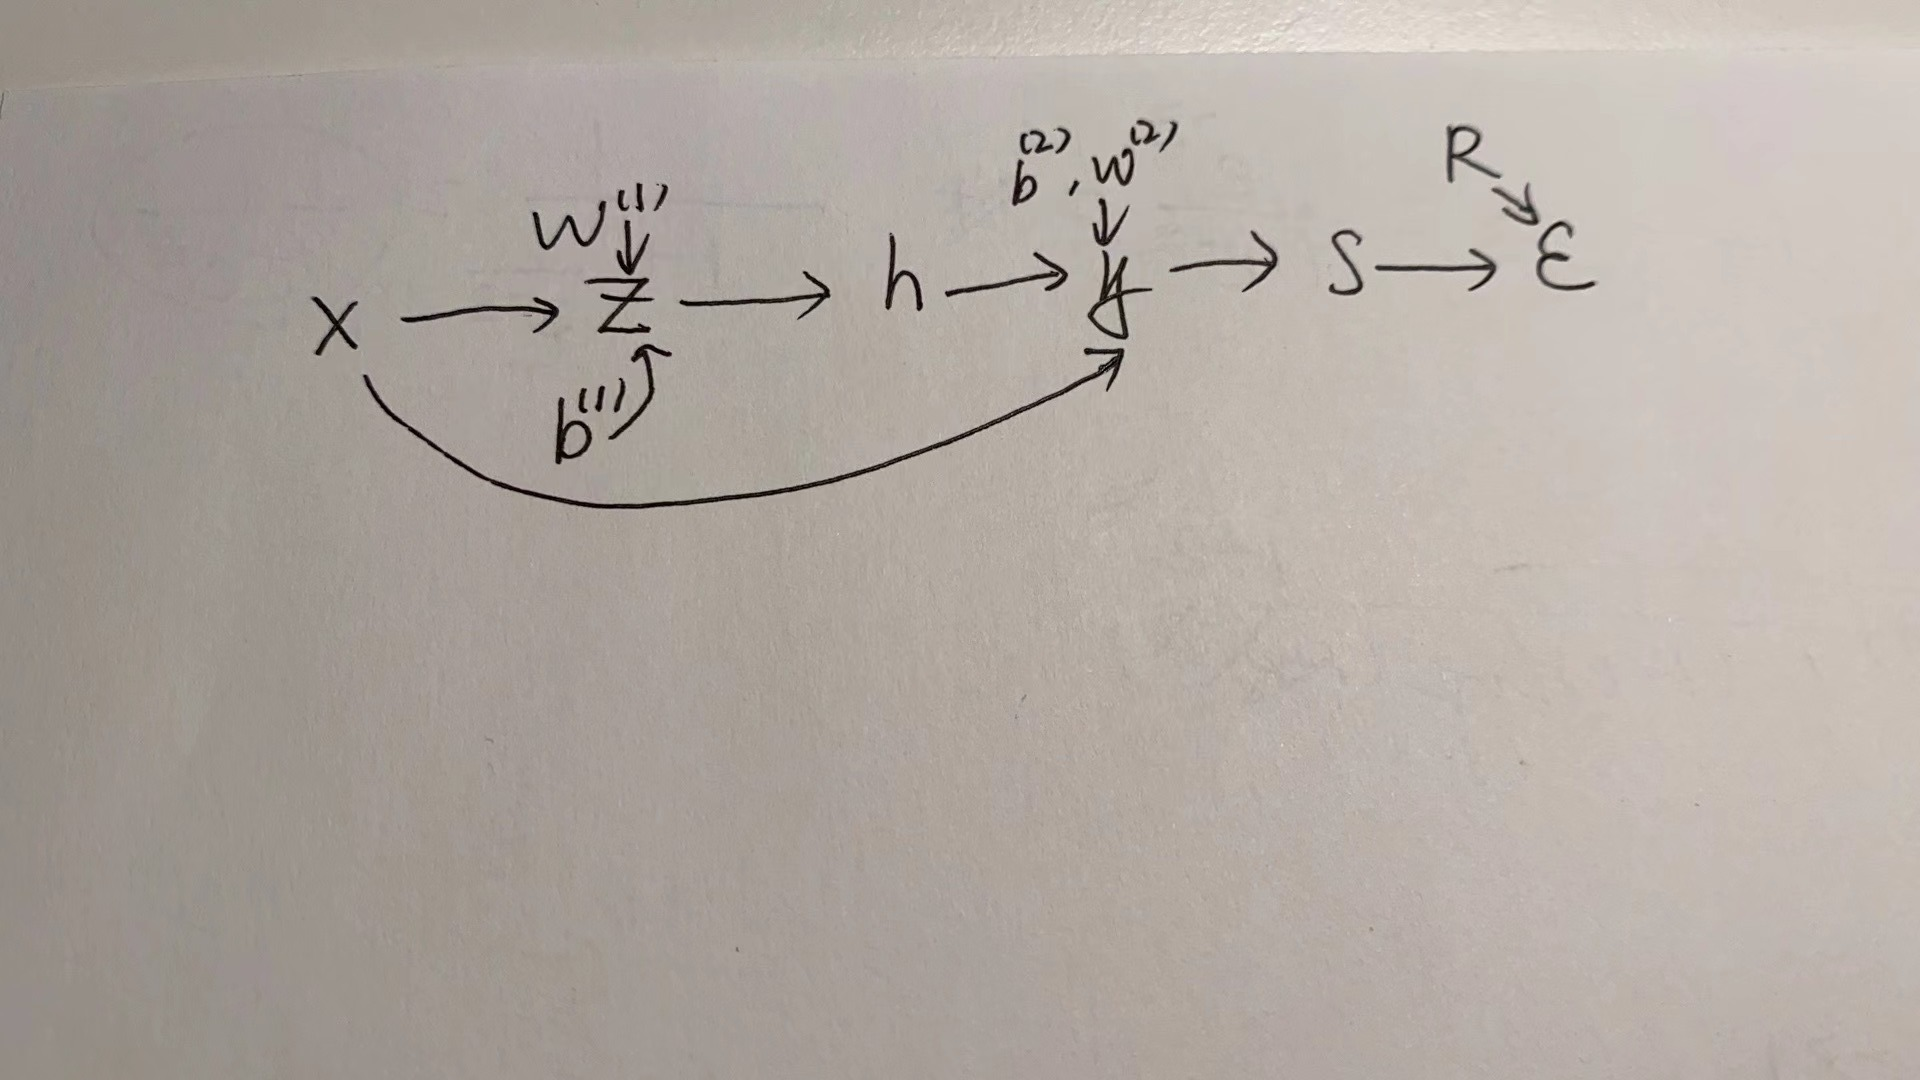

b) Derive the backpropagation equations for computing $\partial \mathcal{E} / \partial W^{(1)}$. To make things simpler, you may use $\sigma'$ to denote the derivative of the ReLU function.

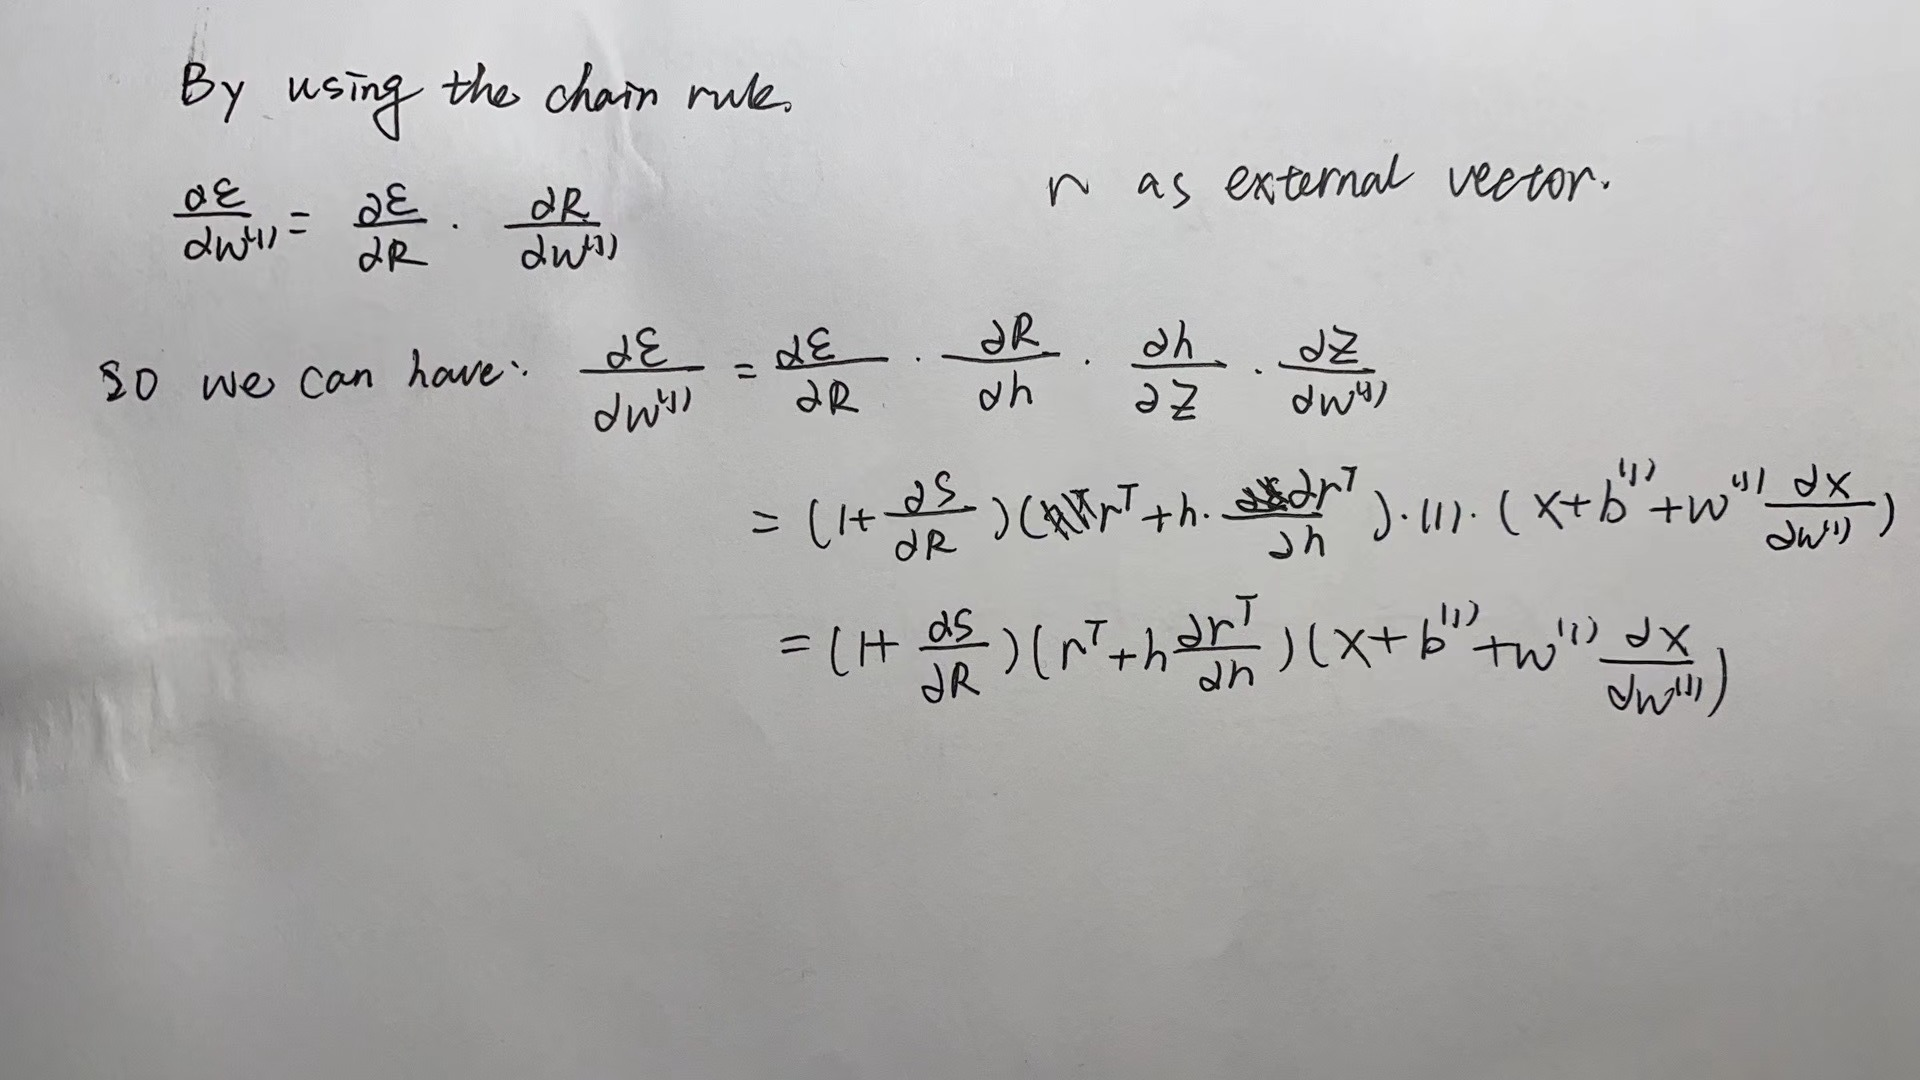

## **4. Tuning generalization**

In this question you will construct a neural network to classify a large set of low resolution images. Differently from Q2, in this case we suggest you a neural network to start experimenting with, but we would like you to describe the behavior of the network as you modify certain parameters. You will be reproducing some concepts mentioned during the lectures, such as when we show how generalization changes as the number of parameters are changed.

a) Use the CIFAR-100 dataset (available from Keras)

```python
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) =
cifar100.load_data(label_mode='fine')
```
to train a neural network with two hidden layers using the logistic activation function, with 500 and 200 hidden nodes, respectively. The output layer should be defined according to the nature of the targets.

In [ ]:
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original.shape

(50000, 32, 32, 3)

In [ ]:
train_images = x_train_original.astype('float32') / 255
test_images = x_test_original.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(y_train_original)
test_labels = to_categorical(y_test_original)

a) Generate a plot that shows average precision for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten

train = []
test = []

# set a list contain the different epochs
for i in [5,10,15,20,25]:
    model = models.Sequential()
    model.add(layers.Dense(500, activation='relu', input_shape=(32,32,3)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(Flatten())
    model.add(layers.Dense(100, activation='softmax'))

    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# train our model for 5 epochs (5 iterations over all samples in the x_train and 
# y_train tensors), in mini-batches of 128 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart
    model.fit(train_images, train_labels, epochs=i, batch_size=128)

    # add the train accuracy to the list
    train_accuracy = model.evaluate(train_images, train_labels)[1]

    
    test_accuracy = model.evaluate(test_images, test_labels)[1]
    train.append(train_accuracy)

    # add the test accuracy to the list
    test.append(test_accuracy)




plt.plot(epochs, train, 'bo', label='Training accuracy')
plt.plot(epochs, test, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# reference: # reference: tutorial_7_Keras_MLP

I think the reasonable number of epoches is 5

b) Generate a plot that shows average precision for training and test sets as a function of the number of weights/parameters (# hidden nodes). For this question part, you will be modifying the architecture that was given to you as a starting point.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten

train = []
test = []

# set a list contain the number of hidden nodes
for i in [200,400,600,800,1000]:
    model = models.Sequential()
    model.add(layers.Dense(i, activation='relu', input_shape=(32,32,3)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(Flatten())
    model.add(layers.Dense(100, activation='softmax'))

    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# train our model for 5 epochs (5 iterations over all samples in the x_train and 
# y_train tensors), in mini-batches of 128 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart
    model.fit(train_images, train_labels, epochs=5, batch_size=128)

    # add the train accuracy to the list
    train_accuracy = model.evaluate(train_images, train_labels)[1]
    test_accuracy = model.evaluate(test_images, test_labels)[1]
    train.append(train_accuracy)

    # add the test accuracy to the list
    test.append(test_accuracy)




plt.plot(epochs, train, 'bo', label='Training accuracy')
plt.plot(epochs, test, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

c) Generate a plot that shows average precision for training and test sets as a function of the number of instances in the training set. For this question part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until
you use the entire training set. Keep the network hyperparameters constant during your experiments.

In [ ]:
# from keras.datasets import cifar100
# (x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

# train_images = x_train_original.astype('float32') / 255
# test_images = x_test_original.astype('float32') / 255

# from tensorflow.keras.utils import to_categorical

# train_labels = to_categorical(y_train_original)
# test_labels = to_categorical(y_test_original)



import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten

train = []
test = []
size = len(train_labels)

for i in range(1,11):
    X_train_image = train_images[0:int(size * i / 10)]
    X_test_image = train_labels[0:int(size * i / 10)]
    model = models.Sequential()
    model.add(layers.Dense(500, activation='relu', input_shape=(32,32,3)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(Flatten())
    model.add(layers.Dense(100, activation='softmax'))

    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# train our model for 5 epochs (5 iterations over all samples in the x_train and 
# y_train tensors), in mini-batches of 128 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart
    model.fit(X_train_image, X_test_image, epochs=5, batch_size=128)

    # add the train accuracy to the list
    train_accuracy = model.evaluate(train_images, train_labels)[1]
    test_accuracy = model.evaluate(test_images, test_labels)[1]
    train.append(train_accuracy)

    # add the test accuracy to the list
    test.append(test_accuracy)




plt.plot(epochs, train, 'bo', label='Training accuracy')
plt.plot(epochs, test, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Size')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

d) Based on all your experiments above, define a network architecture and report accuracy and average precision for all classes.



Based on the result, when the epochs is increasing, the training accuracy will increase but the test accuracy will decrease. Because when we have more epochs, which may lead to overfitting.
The number of nodes have influence on the complexity of the model. If the number increase, the model will be less overfitted. <br/>
By comparing the final results, epochs 5 and nodes 400 is the best model.<be/>
From the part C, we can find that when the size of the data is increasing, the test accuracy will also increase, which means the larger size is , the more accurate the model is.

e) Can you improve test prediction performance by using an ensemble of neural networks?

Combining the predictions from multiple neural networks adds a bias that in turn counters the variance of a single trained neural network model. The results are predictions that are less sensitive to the specifics of the training data, choice of training scheme, and the serendipity of a single training run.<br/>
In addition to reducing the variance in the prediction, the ensemble can also result in better predictions than any single best model.<br/>

So I can make a better performance by using an ensemble of neural networls.<br/>

reference: https://machinelearningmastery.com/ensemble-methods-for-deep-learning-neural-networks/#:~:text=In%20addition%20to%20reducing%20the,single%20network%20used%20in%20isolation.